**Step 1: Load and Preprocess the Data**

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

# Load the dataset with column names
column_names = ["class", "datapoint"]
data = pd.read_csv('ecommerceDataset.csv', header=None, names=column_names)

# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   class      50425 non-null  object
 1   datapoint  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None


In [ ]:
data.head()

,class,datapoint
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


**Step 2: Data Cleaning and Transformation**

In [ ]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Check the distribution of classes
class_counts = data['class'].value_counts()
print("Class distribution:")
print(class_counts)

Missing values:
class        0
datapoint    1
dtype: int64
Class distribution:
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: class, dtype: int64


**Step 3: Text Preprocessing**

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    processed_text = " ".join(stemmed_tokens)
    return processed_text

# Apply preprocessing to the 'datapoint' column
data['processed_datapoint'] = data['datapoint'].apply(preprocess_text)

**Step 4: Feature Extraction using TF-IDF**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Convert text to TF-IDF features
X = tfidf_vectorizer.fit_transform(data['processed_datapoint'])

# Encode the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['class'])

**Step 5: Split Data into Train and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Initialize Classifiers**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Scale the TF-IDF matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "K Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(),
}

**Step 7: Train and Evaluate Classifiers**

In [ ]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

**Step 8: Display Results**

In [ ]:
# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"{name} Classification Report:")
    predictions = classifiers[name].predict(X_test)
    print(classification_report(y_test, predictions, target_names=label_encoder.classes_, zero_division=1))
    print("=" * 50)

Logistic Regression: Accuracy = 0.9378
Logistic Regression Classification Report:
                        precision    recall  f1-score   support

                 Books       0.24      1.00      0.38      2378
Clothing & Accessories       1.00      0.00      0.00      1750
           Electronics       1.00      0.00      0.00      2082
             Household       1.00      0.00      0.00      3875

              accuracy                           0.24     10085
             macro avg       0.81      0.25      0.10     10085
          weighted avg       0.82      0.24      0.09     10085

SVM: Accuracy = 0.9640
SVM Classification Report:
                        precision    recall  f1-score   support

                 Books       0.24      1.00      0.38      2378
Clothing & Accessories       1.00      0.00      0.00      1750
           Electronics       1.00      0.00      0.00      2082
             Household       1.00      0.00      0.00      3875

              accuracy         

In [44]:
X_train

<40339x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1219501 stored elements in Compressed Sparse Row format>

In [45]:
X_test

<10085x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 305363 stored elements in Compressed Sparse Row format>

**ANN**

In [49]:
from keras.models import Sequential
from keras.layers import Dense

# Convert sparse matrices to dense NumPy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using the trained model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

Epoch 1/10
1261/1261 [==============================] - 6s 3ms/step - loss: 0.2922 - accuracy: 0.9120
Epoch 2/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.1641 - accuracy: 0.9529
Epoch 3/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.1364 - accuracy: 0.9608
Epoch 4/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.1122 - accuracy: 0.9686
Epoch 5/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0893 - accuracy: 0.9753
Epoch 6/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0683 - accuracy: 0.9809
Epoch 7/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.0517 - accuracy: 0.9860
Epoch 8/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.0387 - accuracy: 0.9888
Epoch 9/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0307 - accuracy: 0.9915
Epoch 10/10
316/316 [==============================] - 1s 1ms/step


In [50]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy:.4f}")

# Generate classification report
print("ANN Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))


ANN Accuracy: 0.9681
ANN Classification Report:
                        precision    recall  f1-score   support

                 Books       0.97      0.96      0.97      2378
Clothing & Accessories       0.97      0.98      0.98      1750
           Electronics       0.96      0.96      0.96      2082
             Household       0.97      0.97      0.97      3875

              accuracy                           0.97     10085
             macro avg       0.97      0.97      0.97     10085
          weighted avg       0.97      0.97      0.97     10085



**Visualization**

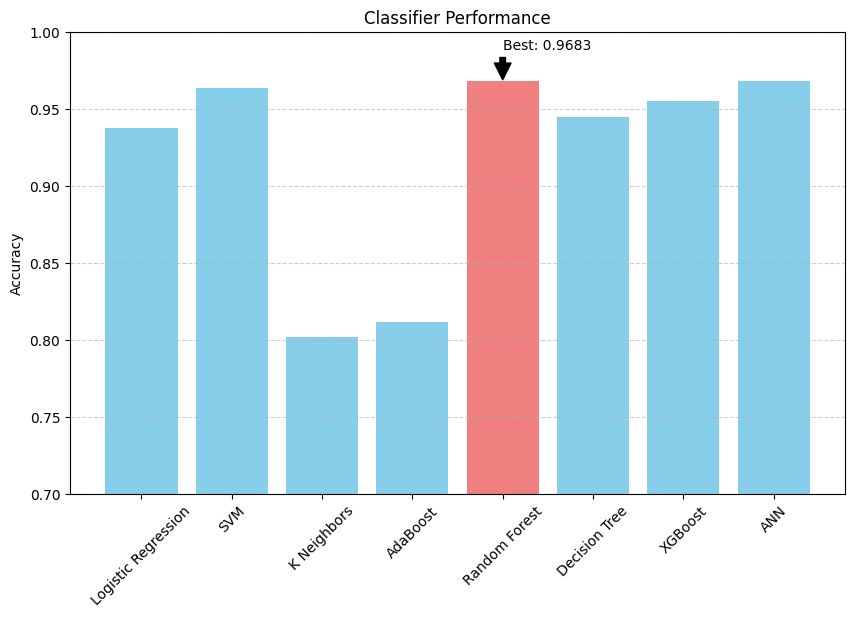

In [55]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = [
    "Logistic Regression", "SVM", "K Neighbors", "AdaBoost",
    "Random Forest", "Decision Tree", "XGBoost", "ANN"
]
accuracies = [0.9378,0.9640,0.8020,0.8119,0.9683,0.9447,0.9554,0.9681]

# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['skyblue'] * len(classifiers)
colors[best_index] = 'lightcoral'

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

# Annotate the best classifier with an arrow
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.7, 1.0)  # Adjusted limits to better fit the accuracy range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
